# Read inputs

In [49]:
# Read techno-economic assumptions and transport distances for transport cost calculation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [50]:
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'

In [82]:
#Definition of variables for pipeline transport costs
tea_pipe = pd.read_excel(path, sheet_name='Pipeline Transport', decimal=',', index_col=0)
tea_pipe

,Parameter,Reference,2020
ID,,,
Discount rate [%],0.05,NaN,NaN
Offshore Capex cost factor,1.7,EHB 2022; IRENA 2022,NaN
Pipeline Opex [€/a as % of Capex],0.017,NaN,NaN
Compressor Opex [€/a as % of Capex],0.009,NaN,NaN
Low - Compression capacity @ 48inch [MW_el/1000km],190,EHB 2020,NaN
...,...,...,...
High - retrofit Offshore (EHB 2022) Capex Compression [€/kg/1000km],1.06,NaN,NaN
NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN


In [83]:
tra_d = pd.read_excel(path, sheet_name='Transport Distances', decimal=',')
tra_d

,Origin_Country,Destination_Country,sea distance (km),onshore distance (km),offshore distance (km),Starting point
0,United Arab Emirates,Germany,12443.10,NaN,NaN,NaN
1,Angola,Germany,9809.65,NaN,NaN,NaN
2,Argentina,Germany,14063.90,NaN,NaN,NaN
3,Austria,Germany,6005.96,500.0,0.0,NaN
4,Australia,Germany,21212.10,NaN,NaN,NaN
...,...,...,...,...,...,...
955,Philippines,China,1782.35,NaN,NaN,NaN
956,Iceland,China,20454.60,NaN,NaN,NaN
957,Papua New Guinea,China,6298.52,NaN,NaN,NaN
958,Cameroon,China,19717.70,NaN,NaN,NaN


In [84]:
# Electrcity wholesale price projections in $_2018/MWh from DNVGL 2018
p_electricity = pd.read_excel(path, sheet_name='Commodity Prices', decimal=',', index_col=0)
p_electricity

,Reference,2020,2021,2022,2023,2024,2025,2026,2027,2028,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Electricity prices in Germany [€_2020/MWh],NaN,NaN,NaN,512.000000,104.000000,NaN,150.000000,133.200000,116.40000,99.600000,...,56.30000,55.60000,54.900000,54.20000,53.50000,52.800000,52.100000,51.400000,50.700000,50.000000
Electricity prices in Norway [€_2018/MWh],DNV Gl 2018,46.683533,47.002654,47.209289,47.346703,47.274782,46.957092,46.416301,46.11822,45.738344,...,49.60933,50.70543,51.925184,53.19331,54.22122,54.704721,54.535295,53.994557,53.715329,53.994428
Electricity prices in Norway [€_2021/MWh],LMA 2021,31.000000,31.800000,32.600000,33.400000,34.200000,35.000000,39.400000,43.80000,48.200000,...,56.80000,54.60000,52.400000,50.20000,48.00000,45.800000,43.600000,41.400000,39.200000,37.000000
EU ETS [€_2020/t_CO2],NaN,25.000000,NaN,80.000000,NaN,NaN,88.000000,94.400000,100.80000,107.200000,...,194.20000,198.40000,202.600000,206.80000,211.00000,215.000000,219.000000,223.000000,227.000000,231.000000
Gas prices in Germany [€_2020/MWh],NaN,13.000000,12.000000,150.000000,300.000000,150.000000,70.000000,60.000000,50.00000,35.000000,...,35.00000,35.00000,35.000000,35.00000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000
Gas prices in Canada [€_2020/MWh],https://www2.deloitte.com/content/dam/Deloitte...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### General inputs

In [85]:

# WACC for all transport investments (pipelines, terminals, liquefaction plants)
i_tra = float(tea_pipe.loc['Discount rate [%]']['Parameter'])
i_tra

0.05

In [86]:
# Economic lifetime for pipelines
l_pipe = float(tea_pipe.loc['Lifetime [Years]']['Parameter'])
l_pipe

40.0

In [87]:
# Amortisation factor for onshore pipelines
alpha = (i_tra * (1 + i_tra)**l_pipe)/(((1 + i_tra)**l_pipe) - 1)
alpha

0.058278161166034986

In [88]:
# Utilisation of the pipeline in %
pipe_use = float(tea_pipe.loc['Pipeline load factor [%]']['Parameter'])
pipe_use

0.75

In [89]:
# Pipeline Opex [€/a as % of Capex]
pipe_opex_share = float(tea_pipe.loc['Pipeline Opex [€/a as % of Capex]']['Parameter'])
pipe_opex_share

0.017

In [90]:
# Compression Opex [€/a as % of Capex]
comp_opex_share = float(tea_pipe.loc['Compressor Opex [€/a as % of Capex]']['Parameter'])
comp_opex_share

0.009

# New pipeline

New onshore pipeline

In [91]:
#Onshore Pipeline capex in [€/kg/100km]
capex_pipe_new_on_EHB = float(tea_pipe.loc['Medium - New Onshore (EHB 2022) Capex Pipeline [€/kg/1000km]']['Parameter'])
capex_pipe_new_on_EHB

2.8

In [92]:
#Compression capex in [€/kg/100km]
capex_comp_new_on_EHB = float(tea_pipe.loc['Medium - New Onshore (EHB 2022) Capex Compression [€/kg/1000km]']['Parameter'])
capex_comp_new_on_EHB

0.62

In [93]:
capex_new_on = capex_pipe_new_on_EHB + capex_comp_new_on_EHB
capex_new_on

3.42

In [94]:
opex_new_on = capex_pipe_new_on_EHB * pipe_opex_share + capex_comp_new_on_EHB * comp_opex_share
opex_new_on

0.053180000000000005

New offshore pipeline

In [95]:
# Pipeline capex offshore new [€/kg/1000km]
capex_pipe_new_off_EHB = float(tea_pipe.loc['Medium - New Offshore (EHB 2022) Capex Pipeline [€/kg/1000km]']['Parameter'])
capex_pipe_new_off_EHB

4.8

In [96]:
# Compression capex offshore new [€/kg/1000km]
capex_comp_new_off_EHB = float(tea_pipe.loc['Medium - New Offshore (EHB 2022) Capex Compression [€/kg/1000km]']['Parameter'])
capex_comp_new_off_EHB

1.06

In [97]:
capex_new_off = capex_pipe_new_off_EHB + capex_comp_new_off_EHB
capex_new_off

5.859999999999999

In [98]:
opex_new_off = capex_pipe_new_off_EHB * pipe_opex_share + capex_comp_new_off_EHB * comp_opex_share
opex_new_off

0.09114

In [99]:
# Onshore pipeline distance between two countries [km]
d_on = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['onshore distance (km)'].values)
d_on

300.0

In [100]:
#not used here
off_factor = float(tea_pipe.loc['Offshore Capex cost factor ']['Parameter'])
off_factor

1.7

In [101]:
# Offshore pipeline distance between two countries [km]
d_off = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['offshore distance (km)'].values)
d_off

650.0

### Electricity cost of compression

In [102]:
# Compression capacity in [MWel/1000km]
capa_comp = float(tea_pipe.loc['Medium - Compression capacity @ 48inch [MW_el/1000km]']['Parameter'])
capa_comp

260.0

In [103]:
# Load factor in hours/day
lf_comp = float(tea_pipe.loc['Assumed load factor for compressor electricity consumption [h/a]']['Parameter'])
lf_comp

5000.0

In [104]:
#Capacity at full load factor [kg H2/a]
capa_pipe = float(tea_pipe.loc['Capacity at full load factor [kg H2/a]']['Parameter'])
capa_pipe

3416741674.167417

In [105]:
# Electricity cost for compression [€/kg/1000km]
comp_el_cost = capa_comp * pipe_use * 8760 * 50/ capa_pipe
comp_el_cost

0.0249975

## Calc. offshore new pipeline cost

In [109]:
# Costs for new pipeline transport [€/kg]
#alpha, capex_pipe_new_on_EHB, capex_comp_new_on_EHB, d_on, d_off, capex_pipe_new_off_EHB, capex_comp_new_off_EHB, capa_comp, pipe_use, capa_pipe
def calculate_off_pipe_new():

    result = ((alpha * capex_new_off/pipe_use + opex_new_off) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off/1000
    return result

In [114]:
years = np.arange(2025,2051)
result = pd.DataFrame(index=years, columns=['New_Pipeline_costs_off'])
result.index.name = 'Years'

for year in years:

    p_el_y = float(p_electricity.loc['Electricity prices in Norway [€_2021/MWh]'][year])


    result.New_Pipeline_costs_off.loc[year] = calculate_off_pipe_new()

result

,New_Pipeline_costs_off
Years,
2025,0.36659
2026,0.36802
2027,0.36945
2028,0.37088
2029,0.37231
2030,0.37374
2031,0.373804
2032,0.373869
2033,0.373934


In [115]:
# export result to excel
from openpyxl import load_workbook
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx')
book.close()

In [116]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'New_pipeline_costs_off.csv')
result.to_csv(output_file, sep=';')

## Calc. on- & offshore new pipeline cost

In [121]:
# Costs for new pipeline transport [€/kg]
#alpha, capex_pipe_new_on_EHB, capex_comp_new_on_EHB, d_on, d_off, capex_pipe_new_off_EHB, capex_comp_new_off_EHB, capa_comp, pipe_use, capa_pipe
def calculate_tc_pipe_new():

    result = (((alpha * capex_new_on/pipe_use + opex_new_on) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe))* d_on
    + ((alpha * capex_new_off/pipe_use + opex_new_off) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off)/1000
    return result

var. input: Electricity price adjusted to EUR

In [122]:
years = np.arange(2025,2051)
result = pd.DataFrame(index=years, columns=['New_Pipeline_costs_on_off'])
result.index.name = 'Years'

for year in years:

    p_el_y = float(p_electricity.loc['Electricity prices in Norway [€_2021/MWh]'][year])


    result.New_Pipeline_costs_on_off.loc[year] = calculate_tc_pipe_new()

result

,New_Pipeline_costs_on_off
Years,
2025,0.467518
2026,0.469608
2027,0.471698
2028,0.473788
2029,0.475877
2030,0.477967
2031,0.478062
2032,0.478157
2033,0.478252


In [123]:
# export result to excel
from openpyxl import load_workbook
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx')
book.close()

In [124]:
# Create csv file from results dataframe
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv,'New_pipeline_costs.csv')
result.to_csv(output_file, sep = ';')

## Plot new pipeline costs

# Retrofit pipeline

Retrofit onshore pipeline

In [125]:
#Retrofit onshore Pipeline capex in [€/ kg / 100km]
capex_pipe_retrofit_on_EHB = float(tea_pipe.loc['Medium - Retrofit Onshore (EHB 2022) Capex Pipeline [€/kg/1000km]']['Parameter'])
capex_pipe_retrofit_on_EHB

0.5

In [126]:
#Compression capex in [€/kg/100km]
capex_comp_retrofit_on_EHB = float(tea_pipe.loc['Medium - New Onshore (EHB 2022) Capex Compression [€/kg/1000km]']['Parameter'])
capex_comp_retrofit_on_EHB

0.62

In [127]:
capex_retrofit_on = capex_pipe_retrofit_on_EHB + capex_comp_retrofit_on_EHB
capex_retrofit_on

1.12

In [128]:
opex_retrofit_on = capex_pipe_retrofit_on_EHB * pipe_opex_share + capex_comp_retrofit_on_EHB * comp_opex_share
opex_retrofit_on

0.01408

Retrofit offshore pipeline

In [129]:
#Retrofit  capex in [€/kg/100km]
capex_pipe_retrofit_off_EHB = float(tea_pipe.loc['Medium - retrofit Offshore (EHB 2022) Capex Pipeline [€/kg/1000km]']['Parameter'])
capex_pipe_retrofit_off_EHB

0.5

In [130]:
#Compression capex in [€/kg/100km]
capex_comp_retrofit_off_EHB = float(tea_pipe.loc['Medium - retrofit Offshore (EHB 2022) Capex Compression [€/kg/1000km]']['Parameter'])
capex_comp_retrofit_off_EHB

1.06

In [131]:
capex_retrofit_off = capex_pipe_retrofit_off_EHB + capex_comp_retrofit_off_EHB
capex_retrofit_off

1.56

In [132]:
opex_retrofit_off = capex_pipe_retrofit_off_EHB * pipe_opex_share + capex_comp_retrofit_off_EHB * comp_opex_share
opex_retrofit_off

0.01804

## Calc. offshore retrofit pipeline costs

In [133]:
# Costs for new pipeline transport [€/kg]
#alpha, capex_pipe_new_on_EHB, capex_comp_new_on_EHB, d_on, d_off, capex_pipe_new_off_EHB, capex_comp_new_off_EHB, capa_comp, pipe_use, capa_pipe
def calculate_off_pipe_retrofit():

    result = (((alpha * capex_retrofit_off/pipe_use + opex_retrofit_off) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off)/1000
    return result

In [134]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Retrofit_pipeline_costs_off'])
result.index.name = 'Years'

for year in years:
    p_el_y = float(p_electricity.loc['Electricity prices in Norway [€_2021/MWh]'][year])

    result.Retrofit_pipeline_costs_off.loc[year] = calculate_off_pipe_retrofit()

result

,Retrofit_pipeline_costs_off
Years,
2025,0.101892
2026,0.103322
2027,0.104752
2028,0.106182
2029,0.107611
2030,0.109041
2031,0.109106
2032,0.109171
2033,0.109236


In [135]:
# export result to excel
from openpyxl import load_workbook
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx')
book.close()

In [136]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'Retrofit_pipeline_costs_off.csv')
result.to_csv(output_file, sep=';')

## Calc. on-&offshore retrofit pipeline costs

In [137]:
# Costs for new pipeline transport [€/kg]
#alpha, capex_pipe_new_on_EHB, capex_comp_new_on_EHB, d_on, d_off, capex_pipe_new_off_EHB, capex_comp_new_off_EHB, capa_comp, pipe_use, capa_pipe
def calculate_tc_pipe_retrofit():

    result = (((alpha * capex_retrofit_on/pipe_use + opex_retrofit_on) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe))* d_on
    + ((alpha * capex_retrofit_off/pipe_use + opex_retrofit_off) + (capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off)/1000
    return result

In [140]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Retrofit_pipeline_costs_on_off'])
result.index.name = 'Years'

for year in years:
    p_el_y = float(p_electricity.loc['Electricity prices in Norway [€_2021/MWh]'][year])

    result.Retrofit_pipeline_costs_on_off.loc[year] = calculate_tc_pipe_retrofit()

result

,Retrofit_pipeline_costs_on_off
Years,
2025,0.137474
2026,0.139564
2027,0.141654
2028,0.143743
2029,0.145833
2030,0.147923
2031,0.148018
2032,0.148113
2033,0.148208


In [141]:
# export result to excel
from openpyxl import load_workbook
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/H2_supply_route_assessment.xlsx')
book.close()

In [114]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'Retrofit_pipeline_costs.csv')
result.to_csv(output_file, sep=';')

# CO2 pipeline

In [44]:
tea_pipe_v2 = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='Pipeline Transport_V2', decimal=',', index_col=0)
tea_pipe_v2

,Parameter,Reference,CO2 offshore Pipeline,Medium - New Onshore (EHB 2022),Medium - Retrofit Onshore (EHB 2022),Medium - New Offshore (EHB 2022),Low - New onshore (Wang 2020),High - New onshore (IEA 2019),Low - New Offshore (EHB 2022),Medium - New Offshore (EHB 2022).1,High - New Offshore (EHB 2022),Retrofit Offshore (IEA 2019),Low - retrofit Offshore (EHB 2022),Medium - retrofit Offshore (EHB 2022),High - retrofit Offshore (EHB 2022)
Properties,,,,,,,,,,,,,,,
Capex Pipeline [€/kg/1000km],NaN,NaN,2.426063,2.8,0.50,4.800,1.1837,3.167353,4.3,4.80,40.0,NaN,40.0,0.50,0.60
Capex Compression [€/kg/1000km],NaN,NaN,0.004383,0.62,0.62,1.060,NaN,NaN,NaN,1.06,NaN,NaN,NaN,1.06,1.06
Opex w/o electricity[as % of Capex],NaN,NaN,NaN,NaN,NaN,0.017,340.0000,340.000000,NaN,NaN,NaN,340.0,NaN,NaN,NaN
Capacity [GW],NaN,NaN,NaN,13,NaN,13.000,NaN,NaN,13.0,13.00,13.0,NaN,NaN,NaN,NaN
Capacity [Mtpa],NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
High - retrofit Offshore (EHB 2022) Levelised transport costs [€/kg/1000km],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Pipeline capex offshore  [€/kg/1000km]
capex_co2_pipe = float(tea_pipe_v2.loc['Capex Pipeline [€/kg/1000km]']['CO2 offshore Pipeline'])
capex_co2_pipe


2.4260627003205117

In [47]:
# Compression capex offshore  [€/kg/1000km]
capex_co2_comp = float(
    tea_pipe_v2.loc['Capex Compression [€/kg/1000km]']['CO2 offshore Pipeline'])
capex_co2_comp

0.00438281813544664

In [48]:
opex_share_co2_comp = float(
    tea_pipe_v2.loc['Compressor Opex [€/a as % of Capex]']['CO2 offshore Pipeline'])
opex_share_co2_comp

0.04

In [49]:
opex_share_co2_pipe = float(
    tea_pipe_v2.loc['Pipeline Opex [€/a as % of Capex]']['CO2 offshore Pipeline'])
opex_share_co2_pipe

0.01

In [ ]:
def calculate_CO2_pipe_off():
    result = (((alpha * capex_retrofit_off / pipe_use + opex_retrofit_off) + (
                capa_comp * pipe_use * 8760 * p_el_y / capa_pipe)) * d_off) / 1000
    return result

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['CO2_pipeline_costs_off'])
result.index.name = 'Years'

for year in years:
    p_el_y = float(p_electricity.loc['Germany'][year]) * 0.89

    result.Retrofit_pipeline_costs_off.loc[year] = calculate_CO2_pipe_off()

result

# Plot cost breakdown for pipeline transport

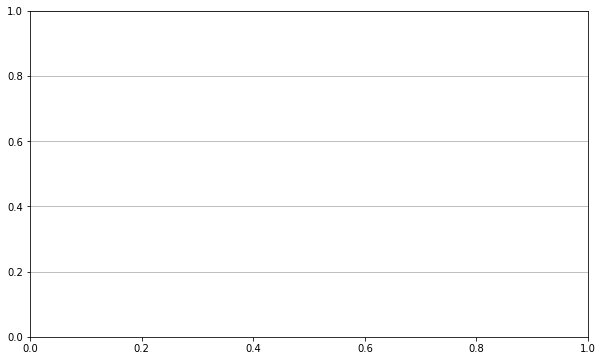

In [115]:
# Emission breakdown for pipeline transport
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)

